## Dataset1- Logistic Regression - Catherine
aims to train a model for predicting mobile phone prices based on various attributes, specifications, and features. The goal is to assist phone manufacturers in market research and provide a price indicator for different phones' cost performance.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('train.csv')
# Splitting the dataset into features and target variable
X = df.drop('price_range', axis=1)
y = df['price_range']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [3]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_acc)
print()
# Linear Regression (treating the target as continuous)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_pred = lin_reg.predict(X_test_scaled)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_pred)
print("Linear Regression MSE:", lin_reg_mse)
print("Linear Regression R-squared:", lin_reg_r2)

Logistic Regression Accuracy: 0.975

Linear Regression MSE: 0.1046929021193067
Linear Regression R-squared: 0.9215339010437136


# Cross-validation

In [4]:
# Cross-validation for Logistic Regression
log_reg_cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Scores:", log_reg_cv_scores)


Logistic Regression CV Scores: [0.95     0.95     0.946875 0.934375 0.96875 ]


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print(confusion_matrix(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))


Logistic Regression Accuracy: 0.975
[[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400




## Hyperparameter Tuning using Grid Search CV

In [9]:
# Create a Logistic Regression instance
log_reg = LogisticRegression(max_iter=1000)

# Setting up the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Setting up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=0)

# Fitting the model with GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluating the model with the best hyperparameters
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Output the best parameters and the corresponding accuracy
print("Best Parameters:", best_params)
print("Accuracy with Hyperparameter Tuning:", accuracy)

# Cross-validation
cv_results = cross_validate(best_model, X, y, cv=8, scoring=['accuracy', 'neg_mean_squared_error'])

# Printing the results
print('Accuracy for each fold:')
print(cv_results['test_accuracy'])

print('Mean Squared Error for each fold:')
print(-1 * cv_results['test_neg_mean_squared_error'])

print('Average Accuracy =', cv_results['test_accuracy'].mean())
print('Average MSE =', (-1 * cv_results['test_neg_mean_squared_error']).mean())


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy with Hyperparameter Tuning: 0.88
Accuracy for each fold:
[0.832 0.884 0.86  0.896 0.88  0.9   0.864 0.844]
Mean Squared Error for each fold:
[0.168 0.116 0.14  0.116 0.12  0.1   0.136 0.156]
Average Accuracy = 0.87
Average MSE = 0.1315


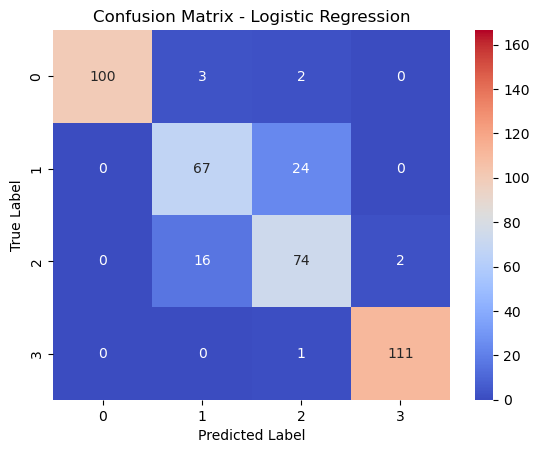

In [7]:
cm = confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
max_val = cm.max()
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", vmin=0, vmax=max_val * 1.5)  # Adjust vmax for lighter colors
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()